In [1]:
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import gspread
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import HTML

In [7]:
mesa = 'data/mesa.csv'
mesa = pd.read_csv(mesa)
mesa.to_html("tables/mesa.html")
mesa

,Timestamp,Positon Group,Name,Weight,Rate of Perceived Exertion,Sleep,Nutrition,Motivation,Life Stress,Fatigue
0,12/11/2019 7:51:08,Linebackers,Ale’a Ynigues,240.0,8,7,6,7,1,6
1,12/11/2019 7:57:48,Defensive Backs,Allen Rogers,185.0,8,7,7,6,9,5
2,12/11/2019 7:57:53,Linebackers,Andrew,174.0,6,8,7,10,3,5
3,12/11/2019 7:55:00,Linemen,Antonio Altamirano,258.0,6,7,5,8,3,3
4,12/11/2019 7:57:57,Linemen,Antonio Altamirano,258.0,6,7,5,8,3,3
...,...,...,...,...,...,...,...,...,...,...
96,2/24/2020 20:41:24,Linebackers,Samuel Rodriguez,185.0,8,8,6,10,1,8
97,2/25/2020 9:33:19,Linebackers,Samuel Rodriguez,185.0,9,8,8,10,1,6
98,2/26/2020 20:17:44,Linebackers,Samuel Rodriguez,185.0,7,8,7,10,3,3
99,2/27/2020 13:05:39,Linebackers,Samuel Rodriguez,185.0,1,8,7,10,1,4


In [8]:
position_group = mesa.groupby("Positon Group").mean()
position_group.to_html("tables/position_group_averages.html")
position_group

,Weight,Rate of Perceived Exertion,Sleep,Nutrition,Motivation,Life Stress,Fatigue
Positon Group,,,,,,,
Defensive Backs,126.888889,6.111111,6.888889,5.777778,8.111111,5.333333,4.777778
Linebackers,184.329730,6.621622,7.405405,6.702703,9.405405,4.162162,4.972973
Linemen,201.025926,5.333333,6.814815,5.222222,8.703704,5.259259,4.814815
Quarterbacks,155.500000,5.000000,7.500000,5.500000,8.500000,2.000000,4.000000
Receivers,153.923077,6.153846,6.076923,6.346154,8.500000,3.884615,4.692308


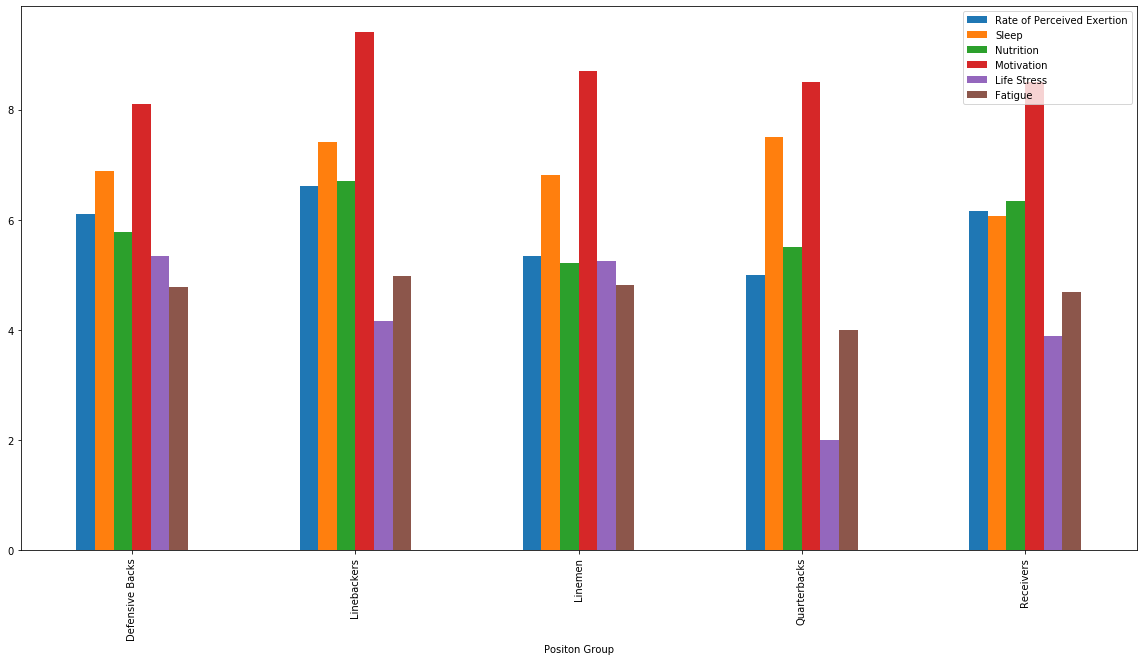

In [9]:
load_score = position_group[["Rate of Perceived Exertion", "Sleep", "Nutrition", 
                             "Motivation", "Life Stress", "Fatigue"]]

load_score.plot(kind='bar', figsize=(20,10))
plt.savefig('position_group_chart.png')
plt.show()

In [18]:
weight_averages = position_group[["Weight"]]
weight_averages

,Weight
Positon Group,
Defensive Backs,126.888889
Linebackers,184.329730
Linemen,201.025926
Quarterbacks,155.500000
Receivers,153.923077


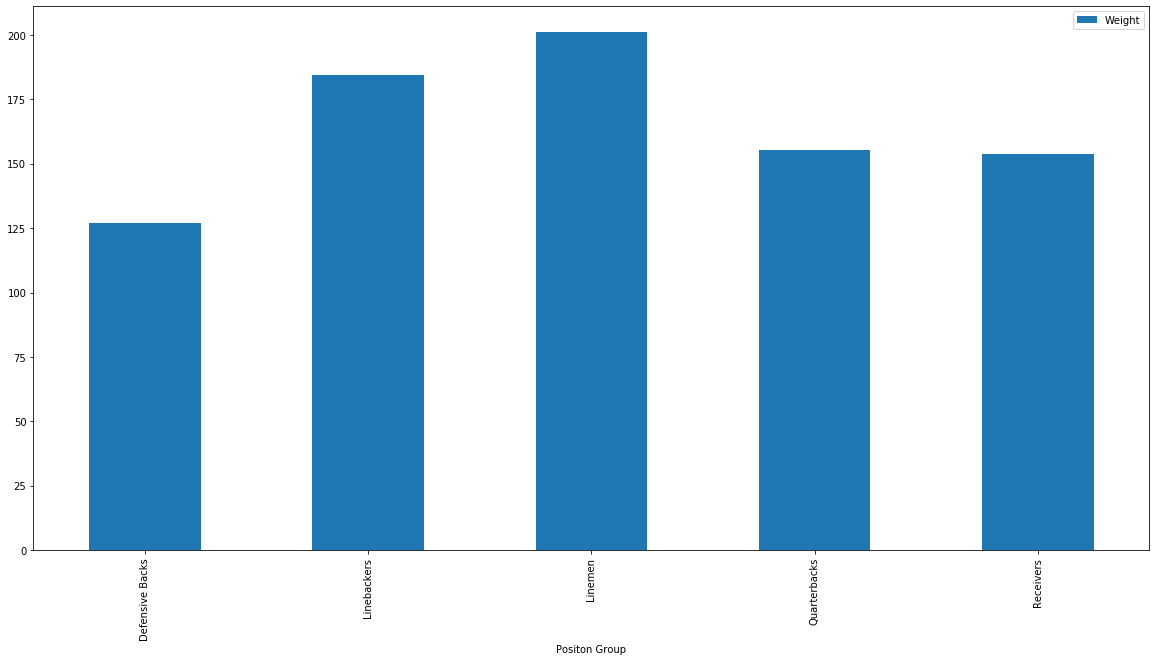

In [19]:
weight_averages.plot(kind='bar', figsize=(20,10))
plt.savefig('position_group_weights.png')
plt.show()

In [24]:
defensive_backs = mesa.loc[mesa["Positon Group"] == "Defensive Backs"]
defensive_backs = defensive_backs[["Rate of Perceived Exertion", "Sleep", "Nutrition", 
                             "Motivation", "Life Stress", "Fatigue"]]
defensive_backs

,Rate of Perceived Exertion,Sleep,Nutrition,Motivation,Life Stress,Fatigue
1,8,7,7,6,9,5
10,7,7,6,10,6,5
12,8,6,4,8,6,4
14,8,6,8,10,4,8
37,5,9,6,6,6,6
40,5,6,7,8,3,4
43,7,7,6,10,1,1
46,2,8,4,10,7,5
58,5,6,4,5,6,5


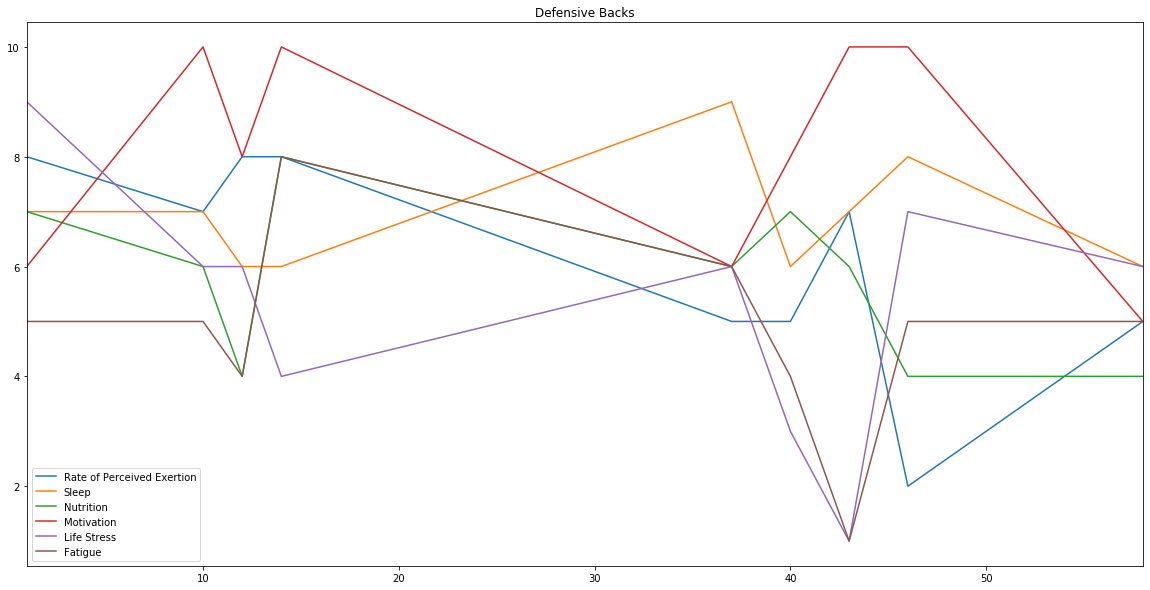

In [34]:
defensive_backs.plot(kind='line', figsize=(20,10))
plt.title("Defensive Backs")
plt.savefig('images/defensivebacks_load_chart.png')
plt.show()

In [31]:
def color_corr(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < .35:
    color = 'black'
  elif value < .50:
    color = 'orange'
  elif value < 0.99:
    color = "green"
  else:
    color = 'gray'

  return 'color: %s' % color
defensive_backs.corr().style.applymap(color_corr)

,Rate of Perceived Exertion,Sleep,Nutrition,Motivation,Life Stress,Fatigue
Rate of Perceived Exertion,1,-0.461389,0.467032,0.027027,-0.087625,0.00738173
Sleep,-0.461389,1,-0.0978406,-0.0519875,0.26968,0.0496967
Nutrition,0.467032,-0.0978406,1,0.175715,-0.263857,0.298056
Motivation,0.027027,-0.0519875,0.175715,1,-0.45565,-0.125489
Life Stress,-0.087625,0.26968,-0.263857,-0.45565,1,0.449931
Fatigue,0.00738173,0.0496967,0.298056,-0.125489,0.449931,1


In [27]:
receivers = mesa.loc[mesa["Positon Group"] == "Receivers"]
receivers = receivers[["Rate of Perceived Exertion", "Sleep", "Nutrition", 
                             "Motivation", "Life Stress", "Fatigue"]]
receivers

,Rate of Perceived Exertion,Sleep,Nutrition,Motivation,Life Stress,Fatigue
6,1,6,7,8,10,10
8,5,6,6,7,4,3
9,1,6,6,7,9,8
11,5,6,4,10,7,8
18,9,7,8,10,7,4
19,7,7,6,8,3,4
20,8,7,6,8,2,4
22,7,6,7,10,4,8
26,8,5,5,8,8,3
27,8,5,3,10,3,8


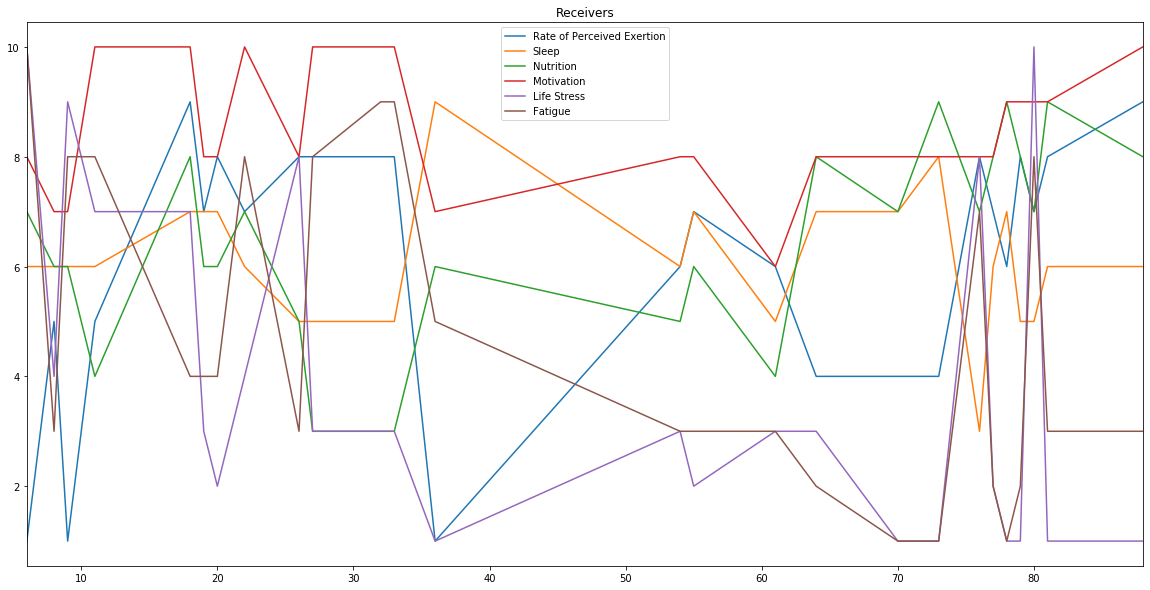

In [35]:
receivers.plot(kind='line', figsize=(20,10))
plt.title("Receivers")
plt.savefig('images/receivers_load_chart.png')
plt.show()

In [30]:
def color_corr(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < .35:
    color = 'black'
  elif value < .50:
    color = 'orange'
  elif value < 0.99:
    color = "green"
  else:
    color = 'gray'

  return 'color: %s' % color

receivers.corr().style.applymap(color_corr)

,Rate of Perceived Exertion,Sleep,Nutrition,Motivation,Life Stress,Fatigue
Rate of Perceived Exertion,1,-0.464592,-0.0755569,0.556661,-0.185226,-0.0967453
Sleep,-0.464592,1,0.347978,-0.205086,-0.42823,-0.419821
Nutrition,-0.0755569,0.347978,1,-0.0662474,-0.163853,-0.545889
Motivation,0.556661,-0.205086,-0.0662474,1,-0.0174004,0.351418
Life Stress,-0.185226,-0.42823,-0.163853,-0.0174004,1,0.612538
Fatigue,-0.0967453,-0.419821,-0.545889,0.351418,0.612538,1


In [36]:
linebackers = mesa.loc[mesa["Positon Group"] == "Linebackers"]
linebackers = linebackers[["Rate of Perceived Exertion", "Sleep", "Nutrition", 
                             "Motivation", "Life Stress", "Fatigue"]]
linebackers

,Rate of Perceived Exertion,Sleep,Nutrition,Motivation,Life Stress,Fatigue
0,8,7,6,7,1,6
2,6,8,7,10,3,5
5,7,7,7,8,9,7
16,7,8,7,9,6,6
21,8,7,6,8,6,4
23,8,8,6,8,7,6
28,6,7,5,10,4,1
35,7,7,5,8,9,5
38,7,8,7,10,7,5
50,5,7,7,9,4,8


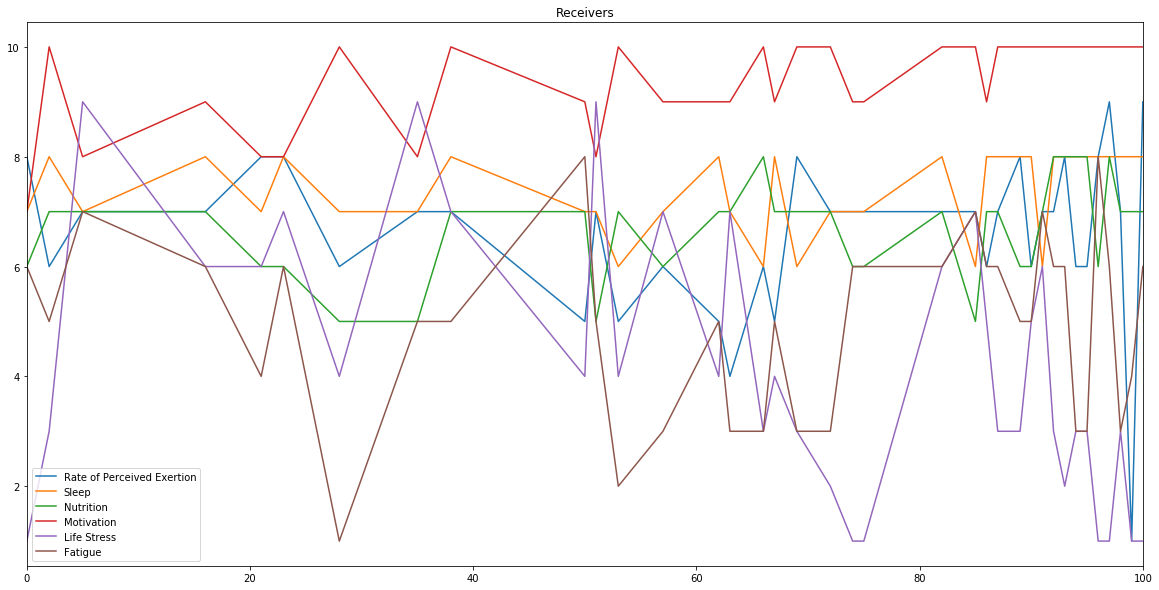

In [37]:
linebackers.plot(kind='line', figsize=(20,10))
plt.title("Receivers")
plt.savefig('images/linebackers_load_chart.png')
plt.show()

In [39]:
def color_corr(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < .35:
    color = 'black'
  elif value < .50:
    color = 'orange'
  elif value < 0.99:
    color = "green"
  else:
    color = 'gray'

  return 'color: %s' % color

linebackers.corr().style.applymap(color_corr)

,Rate of Perceived Exertion,Sleep,Nutrition,Motivation,Life Stress,Fatigue
Rate of Perceived Exertion,1,0.0175104,-0.1105,-0.097647,-0.0514927,0.332286
Sleep,0.0175104,1,0.282017,0.134434,-0.225234,0.192313
Nutrition,-0.1105,0.282017,1,0.43594,-0.376612,-0.0623136
Motivation,-0.097647,0.134434,0.43594,1,-0.413824,-0.211211
Life Stress,-0.0514927,-0.225234,-0.376612,-0.413824,1,0.0213612
Fatigue,0.332286,0.192313,-0.0623136,-0.211211,0.0213612,1


In [41]:
quarterbacks = mesa.loc[mesa["Positon Group"] == "Quarterbacks"]
quarterbacks = quarterbacks[["Rate of Perceived Exertion", "Sleep", "Nutrition", 
                             "Motivation", "Life Stress", "Fatigue"]]
quarterbacks

,Rate of Perceived Exertion,Sleep,Nutrition,Motivation,Life Stress,Fatigue
44,5,8,5,8,2,6
48,5,7,6,9,2,2


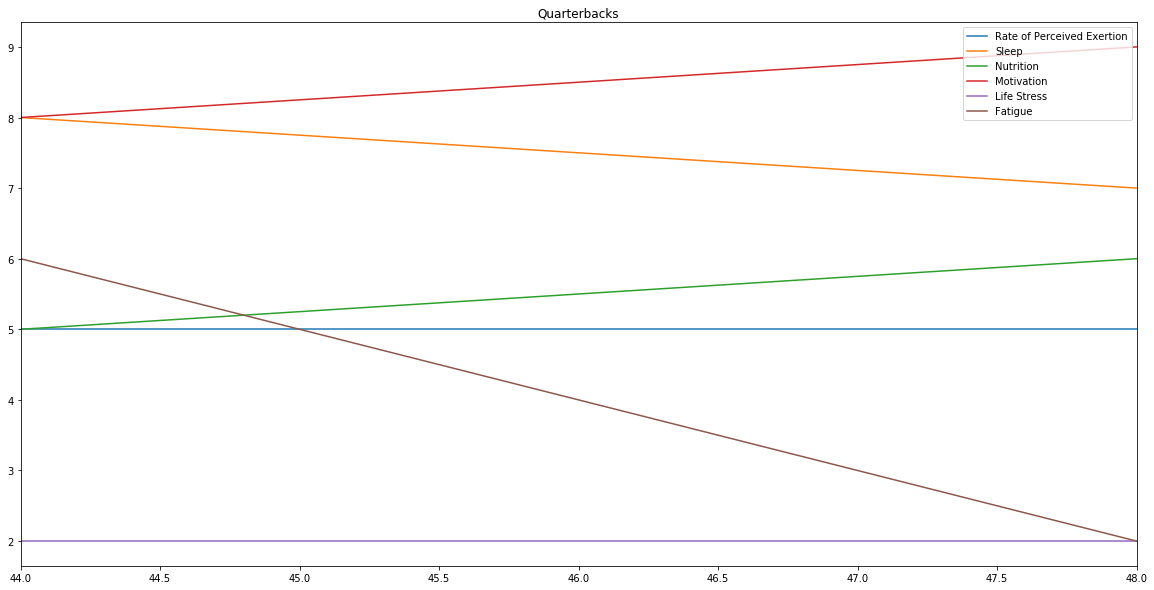

In [42]:
quarterbacks.plot(kind='line', figsize=(20,10))
plt.title("Quarterbacks")
plt.savefig('images/quarterbacks_load_chart.png')
plt.show()

In [43]:
linemen = mesa.loc[mesa["Positon Group"] == "Linemen"]
linemen = linemen[["Rate of Perceived Exertion", "Sleep", "Nutrition", 
                             "Motivation", "Life Stress", "Fatigue"]]
linemen

,Rate of Perceived Exertion,Sleep,Nutrition,Motivation,Life Stress,Fatigue
3,6,7,5,8,3,3
4,6,7,5,8,3,3
7,1,6,7,7,8,9
13,5,7,4,9,8,7
15,5,4,6,10,7,8
17,2,6,2,6,6,3
24,6,8,5,10,4,3
25,4,9,7,10,4,3
29,4,6,4,9,5,4
30,8,9,4,9,4,7


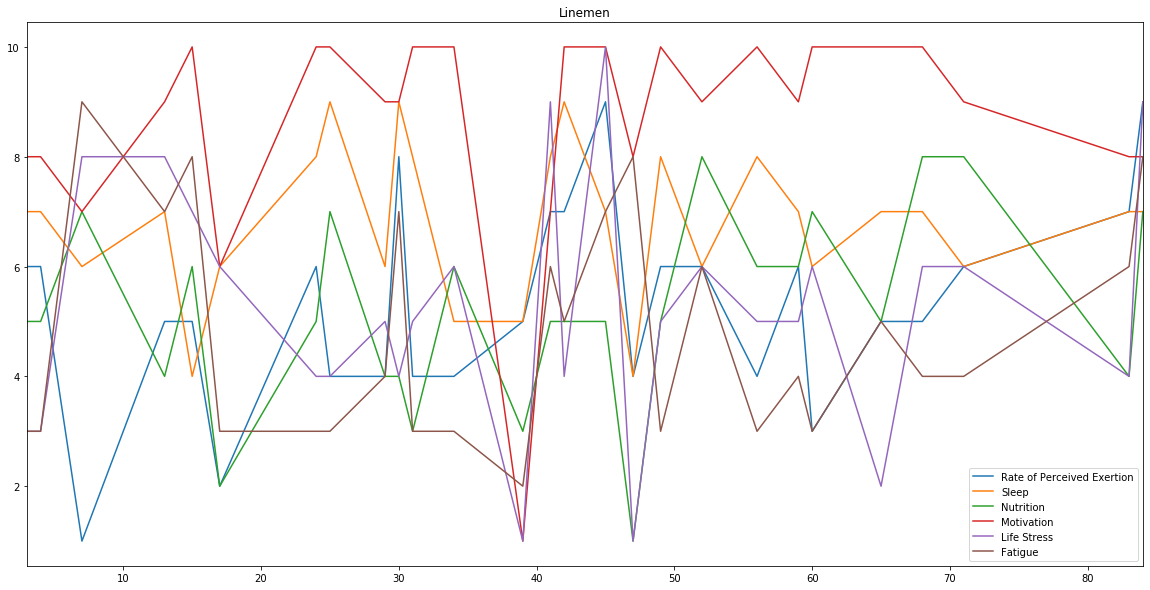

In [45]:
linemen.plot(kind='line', figsize=(20,10))
plt.title("Linemen")
plt.savefig('images/linemen_load_chart.png')
plt.show()